Purpose: To examine the feature importance of different WGCNA modules from the dimensional reduction random forest. Also to plot the accuracy and F1 scores.<br>
Author: Anna Pardo<br>
Date initiated: Aug. 25, 2023

In [25]:
# load modules
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

## Make a basic plot of accuracy & F1 scores

In [2]:
# load scores data
directory = "../../data/rf_outputs/dimensional_reduction_rf_01-Aug-2023/"

In [8]:
# make dictionary of dictionaries of scores for each stressor
sdict = {}
for subd in os.listdir(directory):
    s = subd.split("T")[0]
    for f in os.listdir(directory+subd):
        if f.endswith("_scores.json"):
            sdict[s] = json.load(open(directory+subd+"/"+f))

In [9]:
sdict["Cold"]

{'Accuracy': 0.4810126582278481,
 'F1_class_0': 0.5138339920948617,
 'F1_class_1': 0.4434389140271493,
 'Precision_class_0': 0.5058365758754864,
 'Precision_class_1': 0.45161290322580644,
 'Recall_class_0': 0.5220883534136547,
 'Recall_class_1': 0.43555555555555553,
 'AUC': 0.4689602855867916,
 'Data Balanced': False,
 'Sampling': 'Up'}

In [11]:
# make a dataframe containing: stressor, accuracy, f1 class 0, and f1 class 1
stressor = []
accuracy = []
f10 = []
f11 = []
for k in sdict:
    stressor.append(k)
    accuracy.append(sdict[k]["Accuracy"])
    f10.append(sdict[k]["F1_class_0"])
    f11.append(sdict[k]["F1_class_1"])
    
scoresdf = pd.DataFrame(list(zip(stressor,accuracy,f10,f11)),columns=["Test Set","Accuracy","F1_Control","F1_Stressed"])
scoresdf

,Test Set,Accuracy,F1_Control,F1_Stressed
0,Flooding,0.710145,0.600000,0.772727
1,Low_Nitrogen,0.489933,0.464789,0.512821
2,Heat,0.564232,0.375451,0.665377
3,Drought,0.712690,0.613915,0.771221
4,Cold,0.481013,0.513834,0.443439
5,Salt,0.517857,0.509091,0.526316


In [17]:
scoresdf

,Test Set,Accuracy,F1_Control,F1_Stressed,Mean Accuracy,Mean F1_Control,Mean F1_Stressed
0,Flooding,0.710145,0.600000,0.772727,0.579312,0.512847,0.615317
1,Low_Nitrogen,0.489933,0.464789,0.512821,0.579312,0.512847,0.615317
2,Heat,0.564232,0.375451,0.665377,0.579312,0.512847,0.615317
3,Drought,0.712690,0.613915,0.771221,0.579312,0.512847,0.615317
4,Cold,0.481013,0.513834,0.443439,0.579312,0.512847,0.615317
5,Salt,0.517857,0.509091,0.526316,0.579312,0.512847,0.615317


In [16]:
# add mean columns
for c in scoresdf.columns:
    if c != "Test Set":
        scoresdf["Mean "+c] = scoresdf[c].mean()

Text(0.5, 1.0, 'Dimensional Reduction Random Forest')

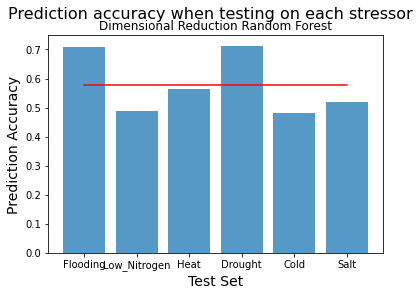

In [20]:
# make a barplot of accuracy with a mean line
plt.bar(scoresdf["Test Set"],scoresdf["Accuracy"],alpha=0.75)
plt.plot(scoresdf["Mean Accuracy"],color="red")
plt.xlabel("Test Set",fontsize=14)
plt.ylabel("Prediction Accuracy",fontsize=14)
plt.suptitle("Prediction accuracy when testing on each stressor",fontsize=16)
plt.title("Dimensional Reduction Random Forest",fontsize=12)

In [23]:
# plotting function for F1
def plot_f1(df):
    # reformat data
    df = df[["Test Set","F1_Control","F1_Stressed","Mean F1_Control","Mean F1_Stressed"]]
    sc = []
    t = []
    mean = []
    f1 = []
    for i in range(len(df.index)):
        sc.append("Stressed")
        t.append(df.iloc[i,0])
        mean.append(df.iloc[i,4])
        f1.append(df.iloc[i,2])
        sc.append("Control")
        t.append(df.iloc[i,0])
        mean.append(df.iloc[i,3])
        f1.append(df.iloc[i,1])
    newdf = pd.DataFrame(list(zip(sc,t,f1,mean)),columns=["Condition","Test Set","F1","Mean F1"])
    # plot
    sns.catplot(data=newdf,kind="bar",x="Test Set",y="F1",hue="Condition")
    sns.lineplot(data=newdf,x="Test Set",y="Mean F1",hue="Condition")
    plt.title("F1")

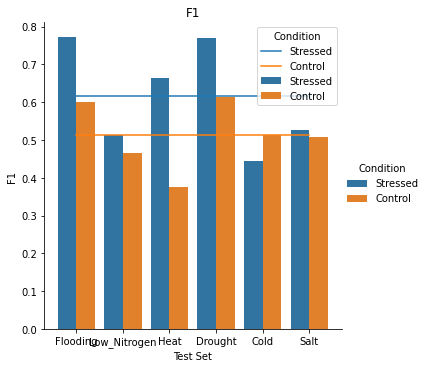

In [26]:
# plot the F1 scores
plot_f1(scoresdf)

## Plot feature importance scores across stressors for each module